In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\nisar\\one drive\\Desktop\\IEEE\\combined_eeg_data.csv")
df.head()

,channel0,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,channel9,channel10,channel11,channel12,channel13,channel14,channel15,label,file_name
0,347.78,198.73,637.59,298.09,278.77,77.28,259.45,408.50,118.69,-110.41,-460.94,-391.94,-11.04,278.77,-792.16,-281.53,0,S10W1.eea.csv
1,507.87,358.82,659.67,317.42,378.14,198.73,378.14,449.90,179.41,-121.45,-422.30,-300.85,-22.08,309.14,-800.44,-240.13,0,S10W1.eea.csv
2,488.54,449.90,488.54,317.42,378.14,419.54,529.95,499.58,149.05,-80.04,-41.40,129.73,138.01,309.14,-342.26,-11.04,0,S10W1.eea.csv
3,369.86,309.14,328.46,289.81,317.42,397.46,507.87,458.18,88.32,27.60,259.45,427.82,309.14,289.81,69.00,259.45,0,S10W1.eea.csv
4,347.78,149.05,248.41,289.81,328.46,408.50,529.95,477.50,187.69,458.18,797.68,858.40,687.27,378.14,877.72,709.36,0,S10W1.eea.csv


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df.drop(['label', 'file_name'], axis=1)  # EEG channels are the features
y = df['label']  # Target labels (0 for healthy, 1 for schizophrenic)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (516096, 16)
Test set shape: (129024, 16)


In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model = LogisticRegression()

In [9]:
model.fit(X_train,y_train)

LogisticRegression()

In [10]:
model.score(X_test,y_test)

0.5358382936507936

In [11]:
y_pred_logreg = model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)

In [14]:
print(f"Accuracy: {accuracy_logreg}")
print("Classification Report:")
print(class_report_logreg)

Accuracy: 0.5358382936507936
Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.00      0.00     59801
           1       0.54      1.00      0.70     69223

    accuracy                           0.54    129024
   macro avg       0.31      0.50      0.35    129024
weighted avg       0.32      0.54      0.37    129024



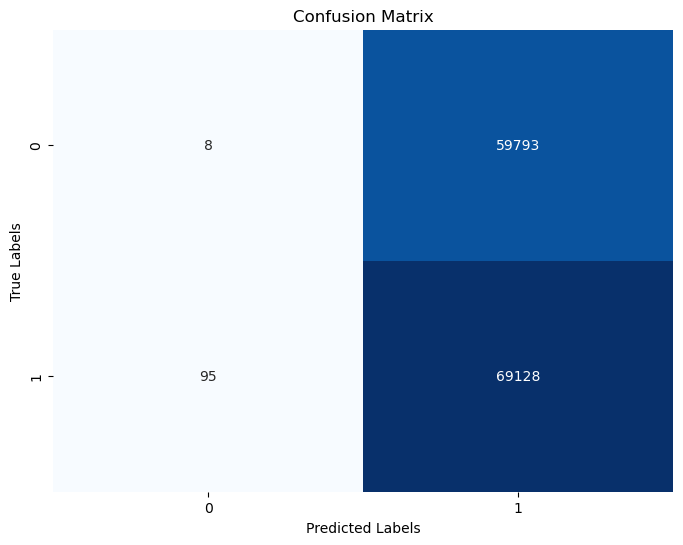

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()